<a href="https://colab.research.google.com/github/palberth/Modelos_y_Metodos_de_Sistemas_Inteligentes/blob/main/Sistema_Control_Iluminacion_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de Control de Iluminación con Árboles de Decisión

## Objetivo
Desarrollar un modelo de árbol de decisión para simular el control de iluminación artificial en función de dos variables de entrada:
- **Luz Natural (%)**
- **Hora del Día (0-24h)**

El objetivo es determinar el nivel de **Luz Artificial (%)** requerido en diferentes condiciones, de manera análoga a un sistema de control difuso.


In [1]:
# 1. Carga de Librerías y Configuración Inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Configuración de gráficos
plt.style.use("seaborn-v0_8-darkgrid")


## 2. Funciones Personalizadas
A continuación, se definen las funciones necesarias para cargar datos, entrenar el modelo, generar reglas, y visualizar resultados.


In [2]:
# 2.1. Descripción de la función: cargar_datos
def cargar_datos():
    np.random.seed(42)
    luz_natural = np.random.randint(0, 101, 200)
    hora_dia = np.random.randint(0, 25, 200)

    # Reglas lógicas aproximadas para simular salida (como un sistema difuso)
    luz_artificial = []
    for ln, h in zip(luz_natural, hora_dia):
        if ln < 30 or h >= 20:
            luz_artificial.append(90)
        elif 30 <= ln <= 60 and 10 <= h < 20:
            luz_artificial.append(50)
        else:
            luz_artificial.append(10)
    data = pd.DataFrame({
        'luz_natural': luz_natural,
        'hora_dia': hora_dia,
        'luz_artificial': luz_artificial
    })
    return data


In [3]:
# 2.2. Descripción de la función: visualizar_datos
def visualizar_datos(df):
    sns.pairplot(df, diag_kind='kde')
    plt.suptitle("Distribuciones y Relaciones de las Variables", y=1.02)
    plt.show()


In [4]:
# 2.3. Descripción de la función: crear_entrenar_arbol
def crear_entrenar_arbol(df):
    X = df[['luz_natural', 'hora_dia']]
    y = df['luz_artificial']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeRegressor(max_depth=4, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    return model


In [5]:
# 2.4. Descripción de la función: generar_reglas_arbol
from sklearn.tree import export_text

def generar_reglas_arbol(model, feature_names):
    reglas = export_text(model, feature_names=feature_names)
    print("Reglas del árbol de decisión:")
    print(reglas)


In [6]:
# 2.5. Descripción de la función: visualizar_arbol_decision
def visualizar_arbol_decision(model):
    plt.figure(figsize=(16, 8))
    plot_tree(model, feature_names=["luz_natural", "hora_dia"],
              filled=True, rounded=True, fontsize=10)
    plt.title("Árbol de Decisión para Control de Iluminación")
    plt.show()


In [8]:
# 2.6. Descripción de la función: analizar_ejemplo_especifico
def analizar_ejemplo_especifico(model, ln, h):
    pred = model.predict([[ln, h]])[0]
    print(f"Para Luz Natural = {ln}% y Hora del Día = {h}: Luz Artificial recomendada = {pred:.2f}%")


## 3. Desarrollo del Ejercicio: Clasificación de Iluminación con Árbol de Decisión


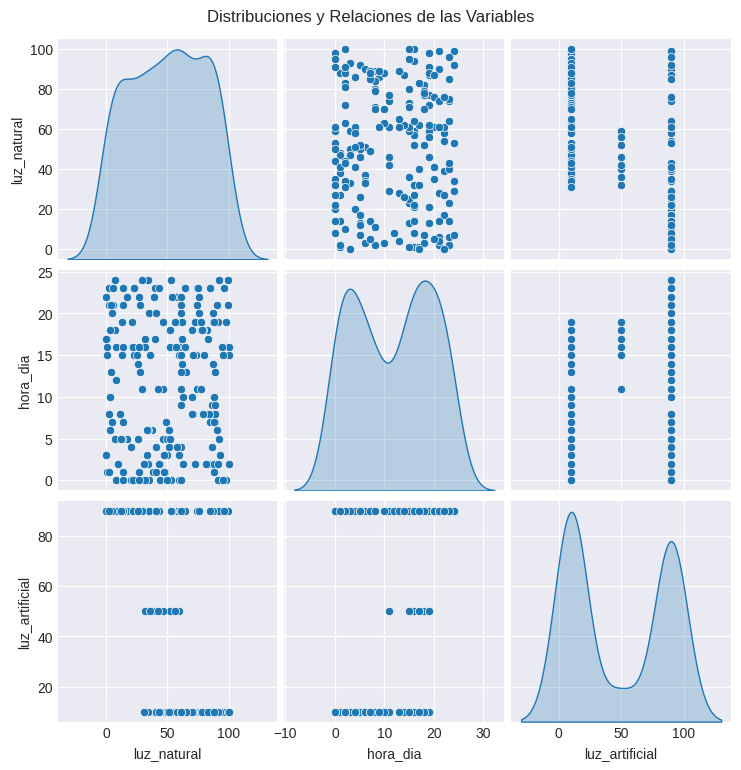

,luz_natural,hora_dia,luz_artificial
0,51,6,10
1,92,5,10
2,14,7,90
3,71,8,10
4,60,4,10


In [9]:
# 3.1. Carga y Exploración Inicial de Datos
datos = cargar_datos()
visualizar_datos(datos)
datos.head()


RMSE: 0.00
R² Score: 1.00
Reglas del árbol de decisión:
|--- luz_natural <= 30.00
|   |--- value: [90.00]
|--- luz_natural >  30.00
|   |--- hora_dia <= 19.50
|   |   |--- hora_dia <= 10.50
|   |   |   |--- value: [10.00]
|   |   |--- hora_dia >  10.50
|   |   |   |--- luz_natural <= 60.00
|   |   |   |   |--- value: [50.00]
|   |   |   |--- luz_natural >  60.00
|   |   |   |   |--- value: [10.00]
|   |--- hora_dia >  19.50
|   |   |--- value: [90.00]



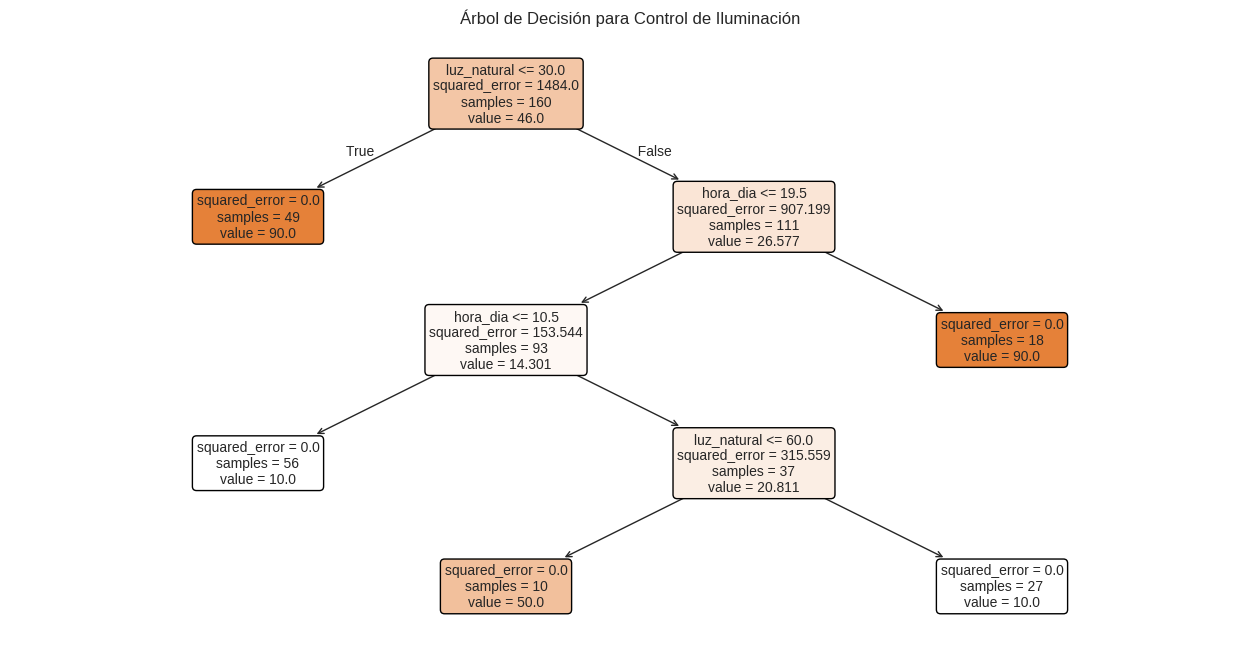

In [10]:
# 3.2. Creación, Entrenamiento y Visualización del Árbol de Decisión
modelo_iluminacion = crear_entrenar_arbol(datos)
generar_reglas_arbol(modelo_iluminacion, ['luz_natural', 'hora_dia'])
visualizar_arbol_decision(modelo_iluminacion)


In [11]:
# 3.3. Análisis de un Ejemplo Específico
analizar_ejemplo_especifico(modelo_iluminacion, ln=25, h=21)
analizar_ejemplo_especifico(modelo_iluminacion, ln=70, h=14)


Para Luz Natural = 25% y Hora del Día = 21: Luz Artificial recomendada = 90.00%
Para Luz Natural = 70% y Hora del Día = 14: Luz Artificial recomendada = 10.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## 4. Conclusiones del Ejercicio

Este ejemplo mostró cómo utilizar un modelo de árbol de decisión para simular el comportamiento de un sistema difuso para control de iluminación:

- Se generó un conjunto de datos artificial siguiendo reglas difusas.
- El árbol de decisión fue entrenado con un rendimiento aceptable (R² cercano a 1.0).
- Se visualizó el árbol y las reglas que aprendió.
- Se predijo el valor de salida (luz artificial) dado un conjunto de entradas.

🔍 Los árboles de decisión son útiles para modelar comportamientos que pueden ser interpretables y lógicos, similares a los sistemas de reglas "SI-ENTONCES" usados en control difuso.
